<h1 align="center"> 🧠💡 Data Mining - HomeWork 2📊🤖</h1> 

<h4 align="center">👋 Prepared by Alaaeddin KHEİTİ</h4>
<h5 align="center">STA 6015 Data Mining Techniques in Statistic </h5>

### Important libraries

In [114]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

### Data Reading

In [115]:
df = pd.read_csv("mall_customers.csv")

In [116]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [117]:
df.shape

(200, 5)

In [118]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [119]:
df.dtypes

customer_id        int64
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

### FCM

In [120]:
X = df[['annual_income', 'spending_score']].values

#### Scaling

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### parameters

In [122]:
n_clusters = 5 # Number of clusters
m = 2  

#### Clustering

In [123]:
cntr, u, u0,d,jm,p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, n_clusters, m, error=0.005, maxiter=1000, init=None
)

In [124]:
fpc

0.6710805993212623

#### Visualize 

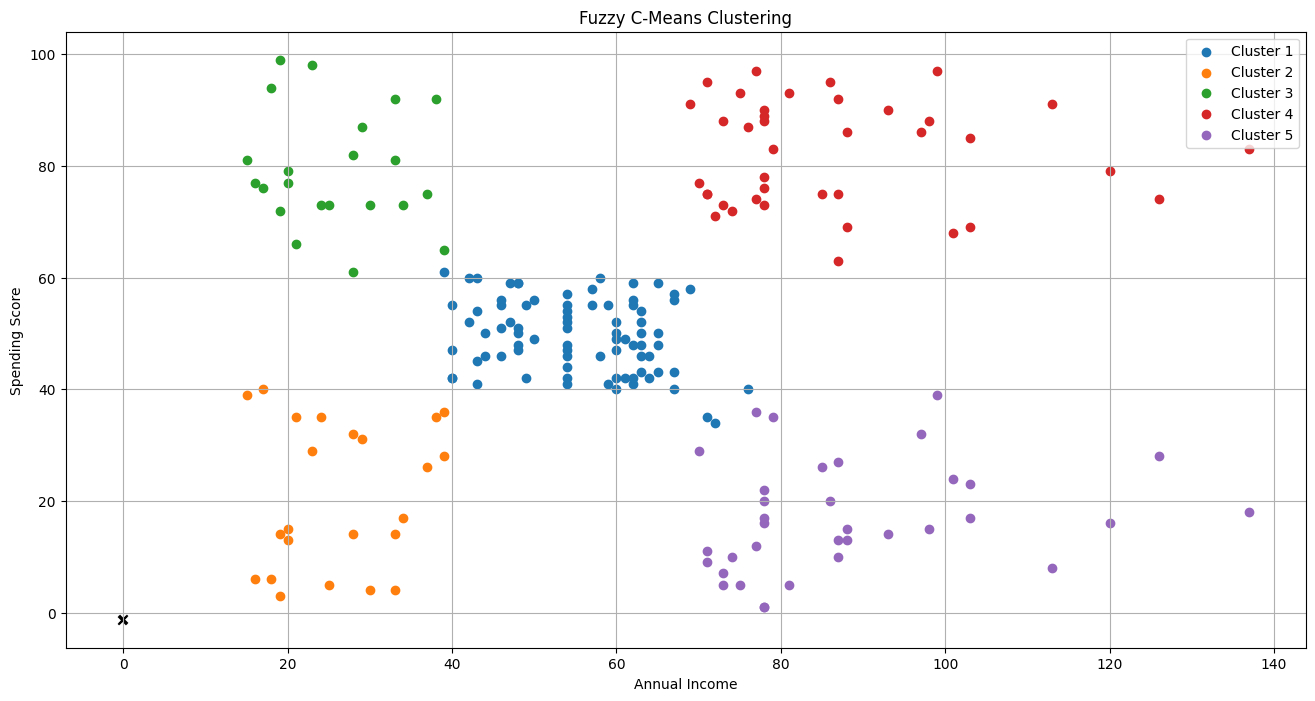

In [134]:
cluster_membership = np.argmax(u, axis=0)

plt.figure(figsize=(16, 8))
for i in range(n_clusters):
    plt.scatter(X[cluster_membership == i, 0], X[cluster_membership == i, 1], label=f'Cluster {i+1}')

plt.scatter(cntr[0], cntr[1], marker='x', color='black')

plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid(True)
plt.show()

### FN-DBSCAN

C:\Users\000\AppData\Local\Temp\ipykernel_21372\3605410261.py:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.data['cluster'] = self.data['cluster'].fillna(-1)


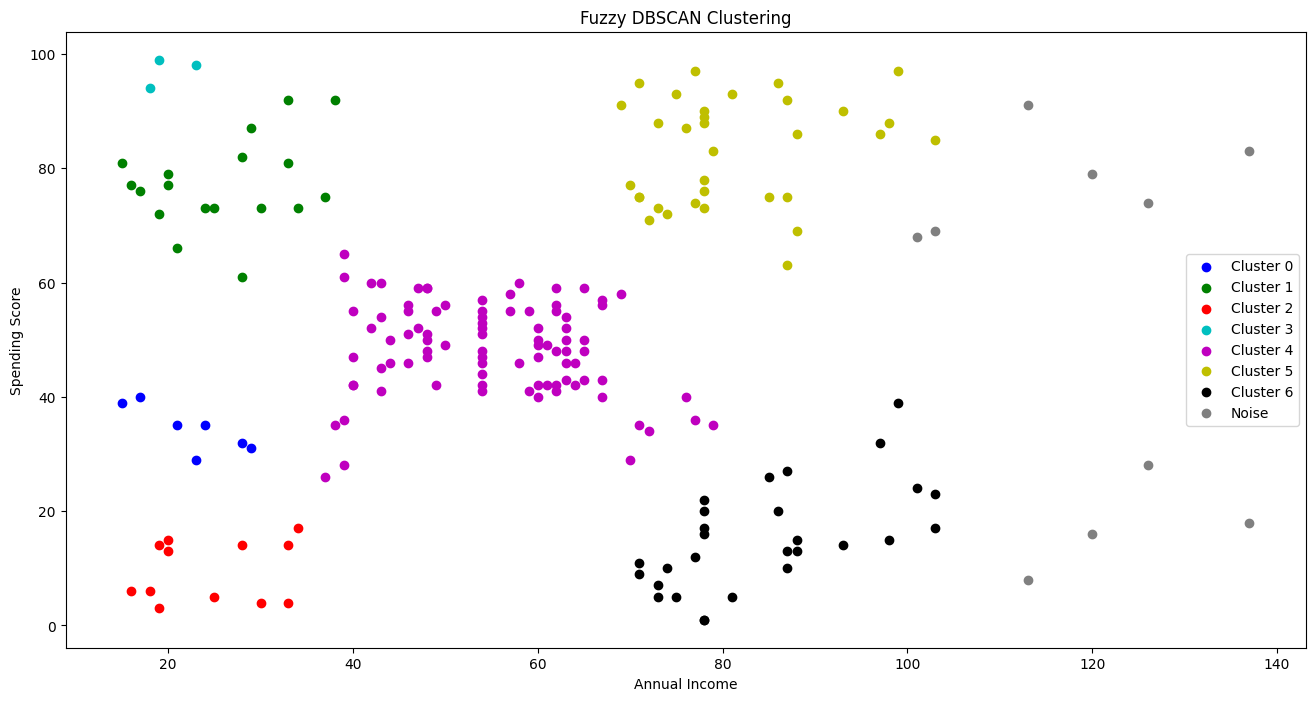

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class FNDBSCAN:
    def __init__(self, df, epsilon1, epsilon2, sigma=1.0):
        self.epsilon1 = epsilon1  
        self.epsilon2 = epsilon2 
        self.sigma = sigma  
        self.data = df 
        self.clusters = []  
        self.data['cluster'] = None  

    def find_neighbors(self, point):
        neighbors = []
        for index, row in self.data.iterrows():
            other_point = DataPoint(row['annual_income'], row['spending_score'])
            membership_degree = self.membership_function(point, other_point)
            if membership_degree >= self.epsilon1:
                neighbors.append((other_point, membership_degree))
        return neighbors

    def membership_function(self, point1, point2):
        distance = ((point1.x - point2.x)**2 + (point1.y - point2.y)**2)**0.5
        return np.exp(-(distance**2) / (2 * self.sigma**2))

    def is_core_point(self, point):
        neighbors = self.find_neighbors(point)
        total_membership = sum(membership for _, membership in neighbors)
        return total_membership >= self.epsilon2

    def expand_cluster(self, point, cluster_id):
        cluster = []
        seeds = self.find_neighbors(point)
        while seeds:
            q, membership = seeds.pop()
            if self.data.loc[(self.data['annual_income'] == q.x) & (self.data['spending_score'] == q.y), 'cluster'].isnull().all():
                cluster.append(q)
                self.data.loc[(self.data['annual_income'] == q.x) & (self.data['spending_score'] == q.y), 'cluster'] = cluster_id
                new_seeds = self.find_neighbors(q)
                seeds.extend(new_seeds)
        self.clusters.append(cluster)

    def fit(self):
        cluster_id = 0
        for index, row in self.data.iterrows():
            point = DataPoint(row['annual_income'], row['spending_score'])
            if pd.isnull(self.data.at[index, 'cluster']) and self.is_core_point(point):
                self.expand_cluster(point, cluster_id)
                cluster_id += 1

        self.data['cluster'] = self.data['cluster'].fillna(-1)

    def plot_clusters(self):
        plt.figure(figsize=(16, 8))
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
        for cluster_id in self.data['cluster'].unique():
            cluster_points = self.data[self.data['cluster'] == cluster_id]
            plt.scatter(cluster_points['annual_income'], cluster_points['spending_score'], 
                        color=colors[int(cluster_id) % len(colors)] if cluster_id != -1 else 'gray', 
                        label=f"Cluster {int(cluster_id)}" if cluster_id != -1 else "Noise")

        plt.xlabel('Annual Income')
        plt.ylabel('Spending Score')
        plt.title('Fuzzy DBSCAN Clustering')
        plt.legend()
        plt.show()

class DataPoint:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.cluster = None

data = df[['annual_income', 'spending_score']]
clustering = FNDBSCAN(df, epsilon1=0.5, epsilon2=2.5, sigma=8.0)
clustering.fit()
clustering.plot_clusters()

In [139]:
clustering.data["cluster"].value_counts()

cluster
 4    89
 5    33
 6    28
 1    18
 2    12
-1    10
 0     7
 3     3
Name: count, dtype: int64

### FJP

Best Partition: [{196}, {198}, {199}, {187, 191}, {195, 197}, {192, 194}, {129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 189, 193, 123, 125, 127}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190}]


C:\Users\000\AppData\Local\Temp\ipykernel_21372\1061593396.py:88: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab20", len(clusters))


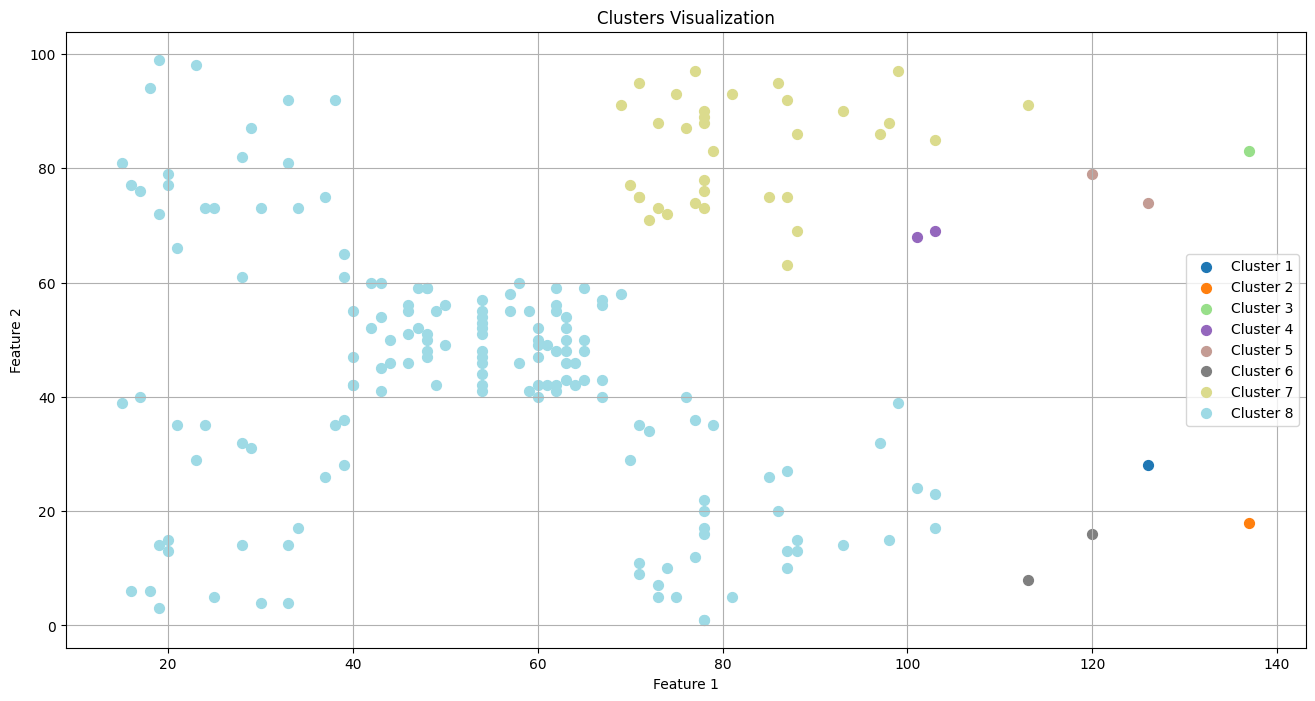

In [146]:
import matplotlib.pyplot as plt
import numpy as np

class FJP:
    def __init__(self, data, alpha):
        self.data = data
        self.alpha = alpha  
        self.n = len(data)
        self.dmax = None
        self.T = None 
        self.T_closure = None  # Transitive closure of T

    def calculate_distances(self):
        distances = np.zeros((self.n, self.n))
        for i in range(self.n):
            for j in range(self.n):
                distances[i, j] = np.linalg.norm(self.data[i] - self.data[j])
        self.dmax = np.max(distances)
        return distances

    def calculate_fuzzy_neighborhood(self, distances):
        self.T = 1 - (distances / self.dmax)

    def calculate_transitive_closure(self):
        self.T_closure = np.copy(self.T)
        for k in range(self.n):
            for i in range(self.n):
                for j in range(self.n):
                    self.T_closure[i, j] = max(self.T_closure[i, j], min(self.T_closure[i, k], self.T_closure[k, j]))

    def calculate_cluster_distance(self, cluster_a, cluster_b):
        return min(
            np.linalg.norm(self.data[i] - self.data[j]) for i in cluster_a for j in cluster_b
        )

    def clusters(self):
        remaining_points = set(range(self.n))
        clusters = []

        while remaining_points:
            seed = next(iter(remaining_points))
            current_cluster = {j for j in remaining_points if self.T_closure[seed, j] >= self.alpha}
            clusters.append(current_cluster)
            remaining_points -= current_cluster

        return clusters

    def fit(self):
        distances = self.calculate_distances()
        self.calculate_fuzzy_neighborhood(distances)
        self.calculate_transitive_closure()

        alpha_values = []
        partitions = []
        current_clusters = [{i} for i in range(self.n)]  

        while len(current_clusters) > 1:
            min_distance = float('inf')
            closest_clusters = None
            for i in range(len(current_clusters)):
                for j in range(i + 1, len(current_clusters)):
                    distance = self.calculate_cluster_distance(list(current_clusters[i]), list(current_clusters[j]))
                    if distance < min_distance:
                        min_distance = distance
                        closest_clusters = (i, j)

            # Use alpha passed in the constructor
            alpha = 1 - (min_distance / self.dmax)
            alpha_values.append(alpha)

            i, j = closest_clusters
            merged_cluster = current_clusters[i] | current_clusters[j]
            current_clusters.pop(j)
            current_clusters.pop(i)
            current_clusters.append(merged_cluster)

            partitions.append(current_clusters[:])

        alpha_differences = [alpha_values[i] - alpha_values[i + 1] for i in range(len(alpha_values) - 1)]
        best_alpha_index = np.argmax(alpha_differences)

        return partitions[best_alpha_index]
    
    def plot_clusters(self, clusters):
        plt.figure(figsize=(16, 8))

        
        colors = plt.cm.get_cmap("tab20", len(clusters))

        
        for i, cluster in enumerate(clusters):
            cluster_points = self.data[list(cluster)]  
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i + 1}", color=colors(i), s=50)

        # Add title and labels
        plt.title("Clusters Visualization")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.grid(True)
        plt.show()


alpha_value = 3 
fjp = FJP(data.values, alpha_value)  
best_partition = fjp.fit()
print("Best Partition:", best_partition)


fjp.plot_clusters(best_partition)

<h4 align="center">👋Sometimes I just use ChatGPT to fill in the function, correct errors, or recommend names in English, while I design the classes, attributes, methods, and all of the steps myself.</h4>